In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

print(tf.__version__) ## 2.1.0

2.1.0


In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

print(train_images.shape) ## (60000, 28, 28)
print(test_images.shape) ## (10000, 28, 28)

(60000, 28, 28)
(10000, 28, 28)


In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

print(Counter(train_labels)) ## label별로 6000개씩
print(Counter(test_labels)) ## label별로 1000개씩

Counter({9: 6000, 0: 6000, 3: 6000, 2: 6000, 7: 6000, 5: 6000, 1: 6000, 6: 6000, 4: 6000, 8: 6000})
Counter({9: 1000, 2: 1000, 1: 1000, 6: 1000, 4: 1000, 5: 1000, 7: 1000, 3: 1000, 8: 1000, 0: 1000})


Ankle boot


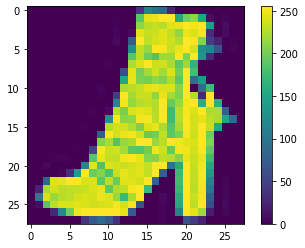

In [4]:
# -- image check
i = 11
print(class_names[train_labels[i]])

plt.figure()
plt.imshow(train_images[i])
plt.colorbar()
plt.grid(False)
plt.show()

In [5]:
# 0~1
train_images = train_images / 255.0
test_images = test_images / 255.0

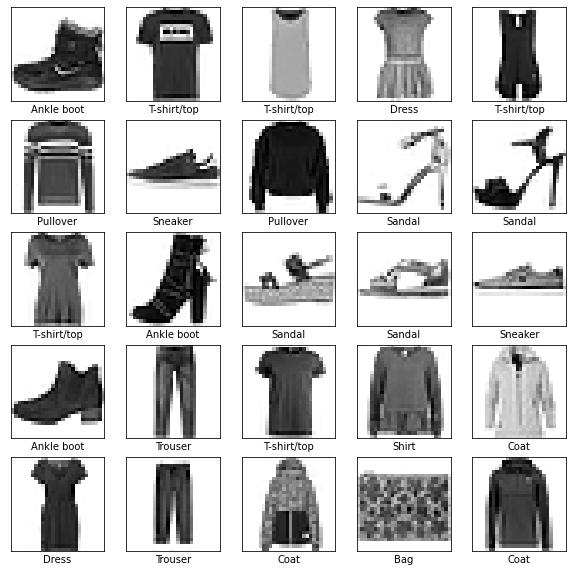

In [6]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1) # 5행 5열 subplot
    # tick -> 그래프의 축에 간격을 구분하기 위해 표시하는 눈금 (https://wikidocs.net/92089)
    plt.xticks([]) # x축 눈금 Disable
    plt.yticks([]) # y축 눈금 Disable
    plt.grid(False) # 격자무늬 False
    plt.imshow(train_images[i], cmap=plt.cm.binary) # colormap: binary (0,1로 구성된 데이터라서)
    plt.xlabel(class_names[train_labels[i]]) # x축 레이블 명시
plt.show()

In [7]:
# model layer setting (layer: extract expression from data)
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)), # train_data[0].shape, 28*28=784 1차원 배열로 변환
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

# model compile -- 컴파일: 모델을 학습시키기 위한 학습과정을 설정하는 단계 (https://hyjykelly.tistory.com/17)
model.compile(optimizer='adam', # 옵티마이저: 모델의 업데이트 방법 -> 데이터와 손실 함수를 바탕으로 결정
              loss='sparse_categorical_crossentropy', # 손실 함수: 모델의 오차 측정 -> 모델의 학습이 올바른 방향으로 향하도록 최소화
              metrics=['accuracy'])

# 모델 훈련
model.fit(train_images, train_labels, epochs=5)

# 정확도 평가
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
## test set 정확도가 train set 정확도보다 낮음 --> 과대적합(overfitting): 머신러닝 모델이 훈련 데이터보다 새로운 데이터에서 성능이 낮아지는 현상
print('\n테스트 정확도:', test_acc)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 3s 51us/sample - loss: 0.4972 - accuracy: 0.8261
Epoch 2/5
60000/60000 [==============================] - 3s 46us/sample - loss: 0.3744 - accuracy: 0.8643
Epoch 3/5
60000/60000 [==============================] - 3s 44us/sample - loss: 0.3355 - accuracy: 0.8781
Epoch 4/5
60000/60000 [==============================] - 3s 43us/sample - loss: 0.3106 - accuracy: 0.8859
Epoch 5/5
60000/60000 [==============================] - 3s 45us/sample - loss: 0.2920 - accuracy: 0.8934
10000/10000 - 0s - loss: 0.3458 - accuracy: 0.8761

테스트 정확도: 0.8761


In [8]:
# make predictions
predictions = model.predict(test_images)

# 0번 test 항목의 10개 item에 대한 모델의 신뢰도를 의미
print(predictions[0]) ## [9.4539541e-07 2.4682887e-09 1.4850147e-07 5.2299868e-08 1.8444594e-07 2.5719048e-03 1.8961692e-06 1.2533501e-02 8.4699250e-06 9.8488289e-01]
print(np.argmax(predictions[0])) ## 9(ankle boot)

[1.8270639e-06 2.2457075e-06 1.7542230e-07 3.2206977e-08 1.3202002e-07
 2.4330236e-02 5.2783716e-06 4.4529166e-02 1.9362264e-05 9.3111163e-01]
9


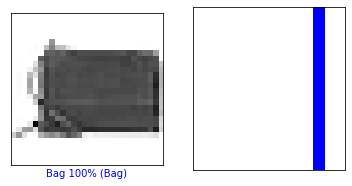

In [9]:
# image plot
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([]) # disable
    plt.yticks([]) # disable
    
    plt.imshow(img, cmap=plt.cm.binary)
    # model의 신뢰도가 가장 높은 품목
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue' # 정답
    else:
        color = 'red' # 오답
        
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                         100*np.max(predictions_array),
                                         class_names[true_label]),
                                         color=color)

# image 신뢰도 plot    
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([]) # disable
    plt.yticks([]) # disable
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
    
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

# image prediction, reliability 확인
i = 18
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()    

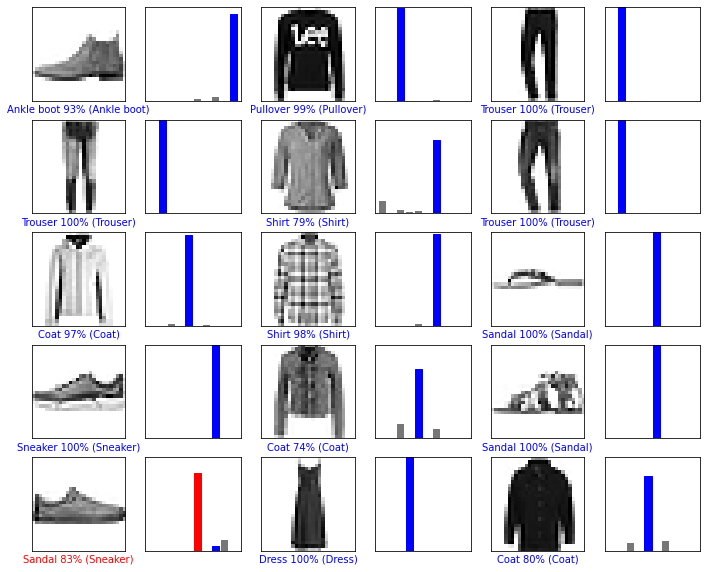

In [10]:
# 처음 X 개의 테스트 이미지와 예측 레이블, 진짜 레이블을 출력합니다
# 올바른 예측은 파랑색으로 잘못된 예측은 빨강색으로 나타냅니다
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, test_labels)
plt.show()